# Lab Segmentation 2

In [132]:
from commonfunctions import *
import numpy as np
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [133]:
def count_pixels(img : np.array):
    hist = np.zeros(256).astype(int)
    img_flatten = img.reshape(-1)
    for pixel in img_flatten:
        hist[pixel] += 1
    
    return hist


def calc_mean(hist):
    total_pixels = np.cumsum(hist, axis=0)[-1]
    pixels = np.linspace(0, hist.shape[0] - 1, hist.shape[0])
    t_int = round(np.sum(pixels * hist) / (total_pixels))
    return int(t_int)

def getThreshold(img : np.array):

    img = img.astype('uint8')
    hist = count_pixels(img)
    t_int = calc_mean(hist)
   
    is_saturated = False
    while not is_saturated:

        lower_t = calc_mean(hist[:t_int + 1])
        higher_t = calc_mean(hist[t_int + 1:])
        t_int_temp = int(np.rint((lower_t + higher_t) / 2))
        
        if t_int_temp == t_int:
            is_saturated = True
        t_int = t_int_temp
    return t_int

def process_image(img):
    t = getThreshold(img)

    
    img = img > t 
    return img + 0.0

In [134]:
imgs = []
imgs.append(io.imread('cameraman.png', as_gray=True))
imgs.append(io.imread('cufe.png', as_gray=True) * 255)
imgs.append(io.imread('book.png', as_gray=True))
imgs.append(io.imread('book1.png', as_gray=True) * 255)

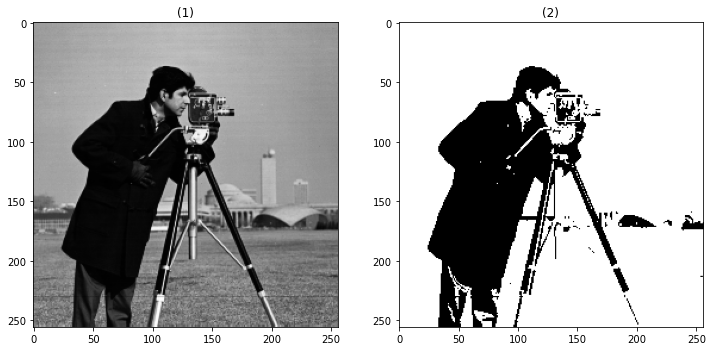

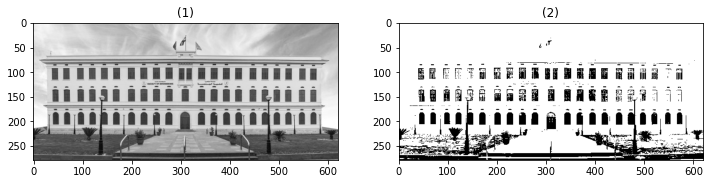

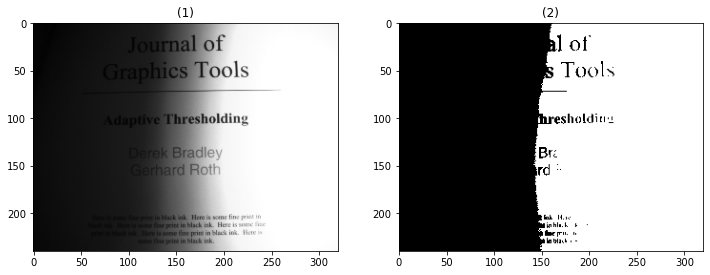

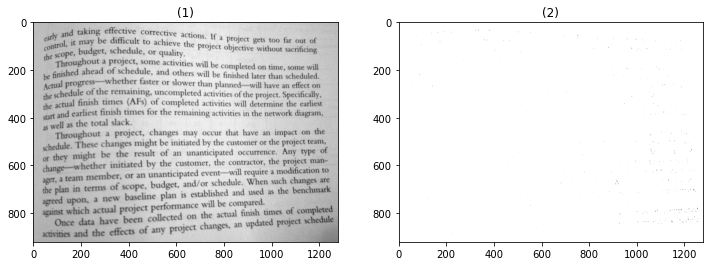

In [135]:
for i in range(len(imgs)):
    show_images([imgs[i], process_image(imgs[i])])

In [136]:
def apply_local_thresholds(img):
    width, height = img.shape
    q1 = process_image(book[0:width // 2, 0:height // 2])
    q2 = process_image(book[0:width // 2, height // 2 :])
    q3 = process_image(book[width // 2 :, 0 : height // 2])
    q4 = process_image(book[width // 2 :, height // 2 :])
    
    new_img = np.zeros_like(book)
    new_img[0:width // 2, 0:height // 2] = q1
    new_img[0:width // 2, height // 2 :] = q2
    new_img[width // 2 :, 0 : height // 2] = q3
    new_img[width // 2 :, height // 2 :] = q4

    return new_img

In [137]:
book = io.imread('book.png', as_gray=True)

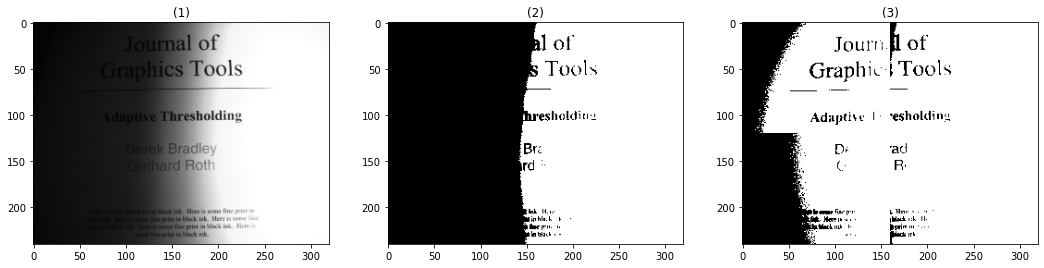

In [138]:
show_images([book, process_image(book), apply_local_thresholds(book)])

In [139]:
def modified_local_thresholds(img, k):
    width, height = img.shape
    window_x = width // k
    window_y = height // k

    new_img = np.zeros_like(book)

    for x in range(0, width, window_x):
        for y in range(0, height, window_y):
            window = process_image(book[x : x + window_x, y:y+window_y])
            new_img[x:x+window_x, y:y+window_y] = window
    return new_img + 0.0

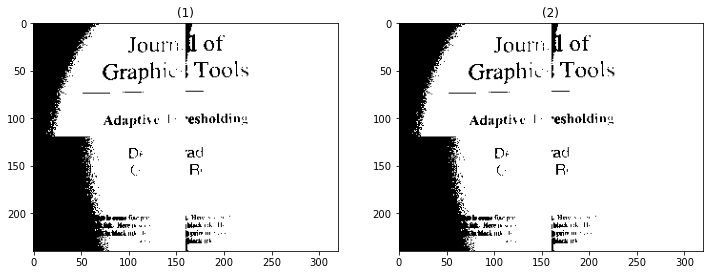

In [140]:
show_images([apply_local_thresholds(book),modified_local_thresholds(book, 2)])